### Importing neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [5]:
data['Geography']=Le.fit_transform(data['Geography']) # 0 = France , 2 = Spain, 1 = Germany
data['Gender']=Le.fit_transform(data['Gender']) #  0 = Female , 1 = Male 

In [6]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [7]:
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [9]:
y 

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

### Train_test_split

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_test.shape,X_train.shape,y_train.shape,y_test.shape

((2000, 10), (8000, 10), (8000,), (2000,))

### Apply Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
Sc = StandardScaler()
X_train = Sc.fit_transform(X_train)
X_test = Sc.transform(X_test)

In [15]:
X_train

array([[ 0.35649971, -0.9055496 ,  0.91324755, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.20389777,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.96147213,  1.50884694,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.86500853, -0.9055496 , -1.09499335, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 0.15932282, -0.9055496 ,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.47065475,  0.30164867,  0.91324755, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [17]:
#Create ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [18]:
classifier = Sequential()

In [19]:
# input layer
classifier.add(Dense(units=11,activation = 'relu'))

In [20]:
# Hidden Layer
classifier.add(Dense(units=7,activation = 'relu'))

In [21]:
# hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [22]:
# output layer
classifier.add(Dense(units=1,activation = "sigmoid"))

In [24]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size = 10,epochs = 25)

Epoch 1/50


536/536 [==============================] - 8s 10ms/step - loss: 0.4967 - accuracy: 0.7820 - val_loss: 0.4577 - val_accuracy: 0.7925
Epoch 2/50
536/536 [==============================] - 3s 6ms/step - loss: 0.4356 - accuracy: 0.8013 - val_loss: 0.4424 - val_accuracy: 0.8171
Epoch 3/50
536/536 [==============================] - 4s 8ms/step - loss: 0.4228 - accuracy: 0.8138 - val_loss: 0.4353 - val_accuracy: 0.8194
Epoch 4/50
536/536 [==============================] - 4s 8ms/step - loss: 0.4134 - accuracy: 0.8225 - val_loss: 0.4307 - val_accuracy: 0.8198
Epoch 5/50
536/536 [==============================] - 4s 7ms/step - loss: 0.4065 - accuracy: 0.8280 - val_loss: 0.4241 - val_accuracy: 0.8236
Epoch 6/50
536/536 [==============================] - 4s 8ms/step - loss: 0.3995 - accuracy: 0.8330 - val_loss: 0.4149 - val_accuracy: 0.8273
Epoch 7/50
536/536 [==============================] - 4s 8ms/step - loss: 0.3904 - accuracy: 0.8350 - val_loss: 0.4097 - val_accuracy: 0.8319
Epo

In [26]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

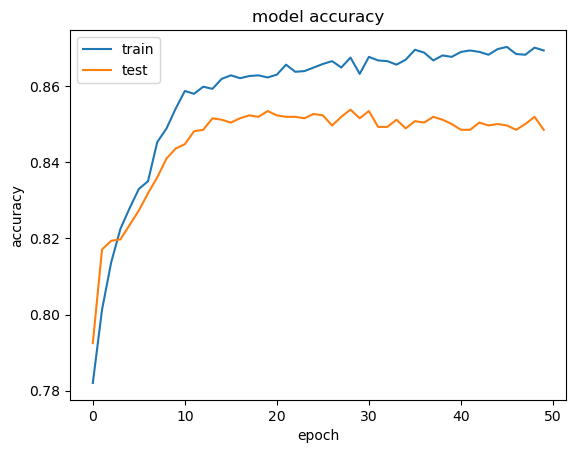

In [29]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

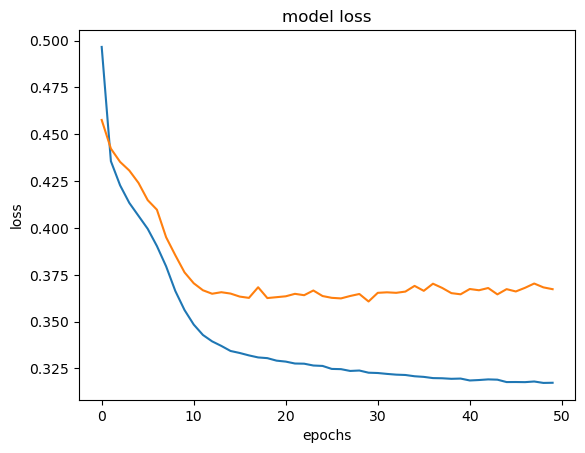

In [30]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('model loss')
plt.show()

In [31]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [32]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [33]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [34]:
score

0.8625

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [36]:
cm

array([[1542,   65],
       [ 210,  183]], dtype=int64)

# ! Thank you